In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from chart_studio.plotly import iplot
import chart_studio.plotly
import warnings
import csv

warnings.filterwarnings("ignore")
chart_studio.tools.set_credentials_file(username='ID', api_key='APIKKEY')
data_path='C:/Users/user/Desktop/income/train.csv'

In [2]:
%matplotlib inline
from matplotlib import rc
import matplotlib.font_manager as fm
#fm._rebuild()
#fm.get_fontconfig_fonts()
#font_location = './NanumGothic.ttf' 
#font_name = fm.FontProperties(fname=font_location).get_name()
#mpl.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus']=False

In [3]:
#READ DATA
train=pd.read_csv('C:/Users/user/Desktop/income/train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [5]:
new_names = {'income_>50K':'income'}
train = train.rename(columns=new_names)
train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [6]:
#NULL값 처리

train['workclass'] = train['workclass'].fillna('None')
train['occupation'] = train['occupation'].fillna('None')
train['native-country'] = train['native-country'].fillna('Others')
train.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

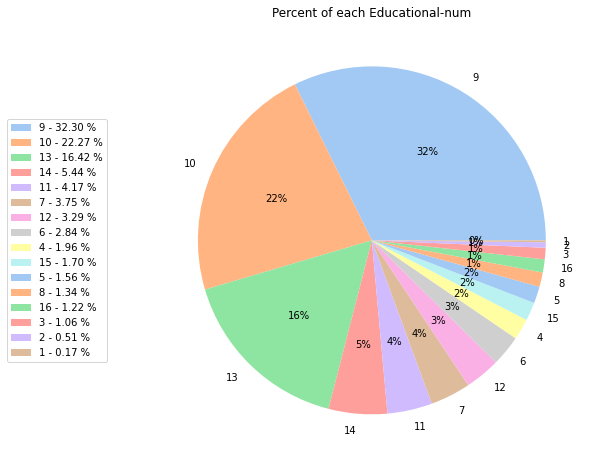

In [7]:
##각 학력 별 %


#많은 수대로 나열
educations=pd.DataFrame(train.groupby('educational-num').count())
educations=educations.sort_values(by=['age'], axis=0, ascending=False)
#display(educations)

colors = sns.color_palette('pastel')[0:15]

fig = plt.figure(figsize=(8,8))
pie=plt.pie(educations.age, labels=educations.index, colors=colors, autopct='%.0f%%')
plt.title("Percent of each Educational-num")

y=educations.age
porcent = 100.*y/y.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(educations.index, porcent)]

plt.legend(pie, labels=labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=10)
plt.show()


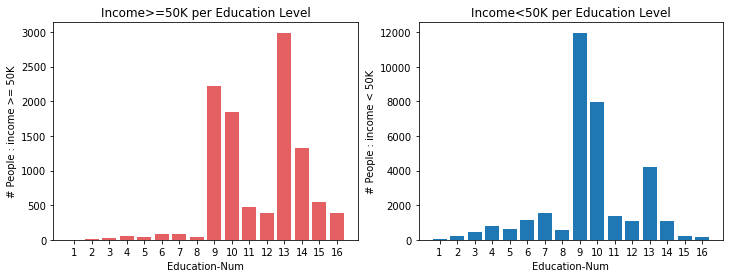

<AxesSubplot:title={'center':'Income and Educational-num'}, xlabel='educational-num', ylabel='count'>

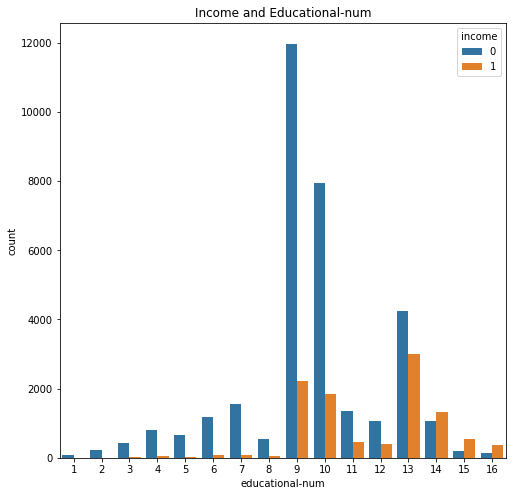

In [10]:
#RELATION BETWEEN EDUCATIONAL-NUM AND INCOME

pd.set_option('display.max_colwidth', 50)

##DATA 가공
incomes = pd.Series(train['income'])

'''
edu = pd.Series(train['educational-num'])
display(incomes)
display(edu)

display(incomes.index)
display(incomes.values)
'''

income_education=pd.DataFrame(train.groupby('educational-num')['income'].count())
#display(income_education)


more50=pd.DataFrame(train[train.income==1].groupby('educational-num')['income'].count())
less50=pd.DataFrame(train[train.income==0].groupby('educational-num')['income'].count())

more50.rename(columns={'income':'incomeup'}, inplace=True)
less50.rename(columns={'income':'incomedown'}, inplace=True)
#display(more50)
#display(less50)

'''
more50_arr=incomes.loc[incomes.values == 1]
more50_num=more50_arr.index
display(more50_arr)
display(more50_num)
'''

##MERGE MORE50K & LESS50K
incomereturn = pd.merge(more50, less50, on='educational-num')
#display(incomereturn)

##income과 educational-num graph
income_education.index=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Income>=50K per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : income >= 50K')
x=np.arange(16)
plt.bar(x, more50.incomeup, color='#e35f62')
plt.xticks(x, income_education.index)

plt.subplot(1,2,2)
plt.title('Income<50K per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : income < 50K')
x=np.arange(16)
plt.bar(x, less50.incomedown)
plt.xticks(x, income_education.index)
plt.show()


fig = plt.figure(figsize=(8,8))
plt.title('Income and Educational-num')
sns.countplot(data=train, x="educational-num", hue="income")

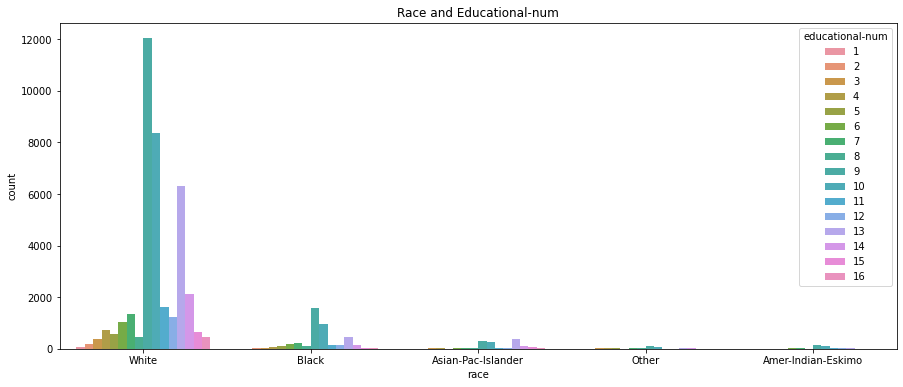

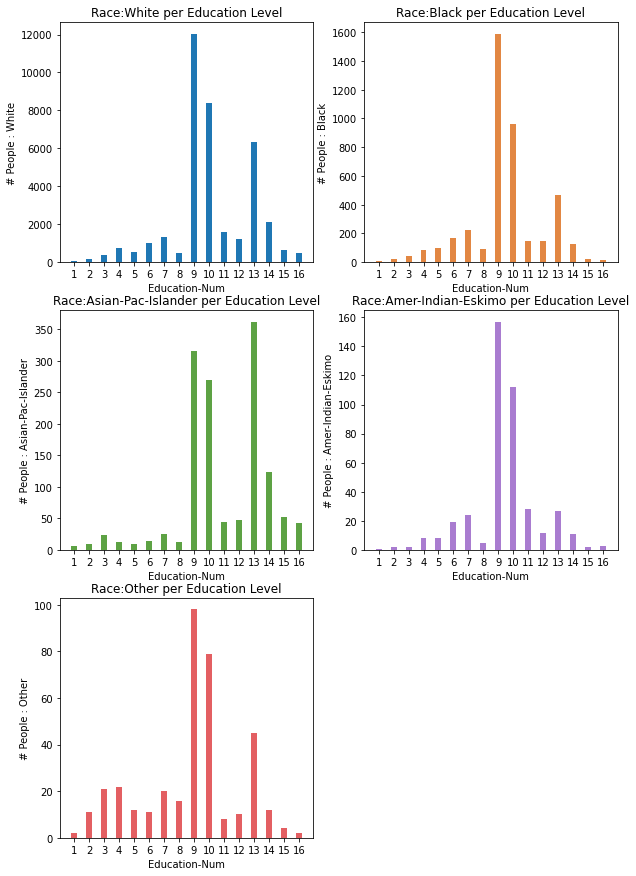

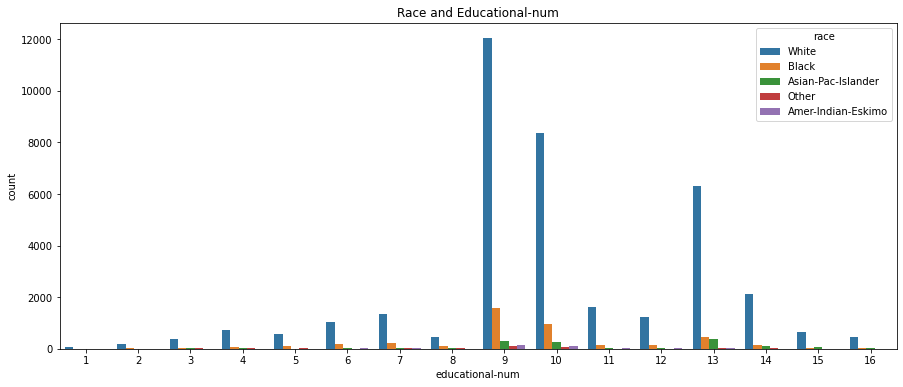

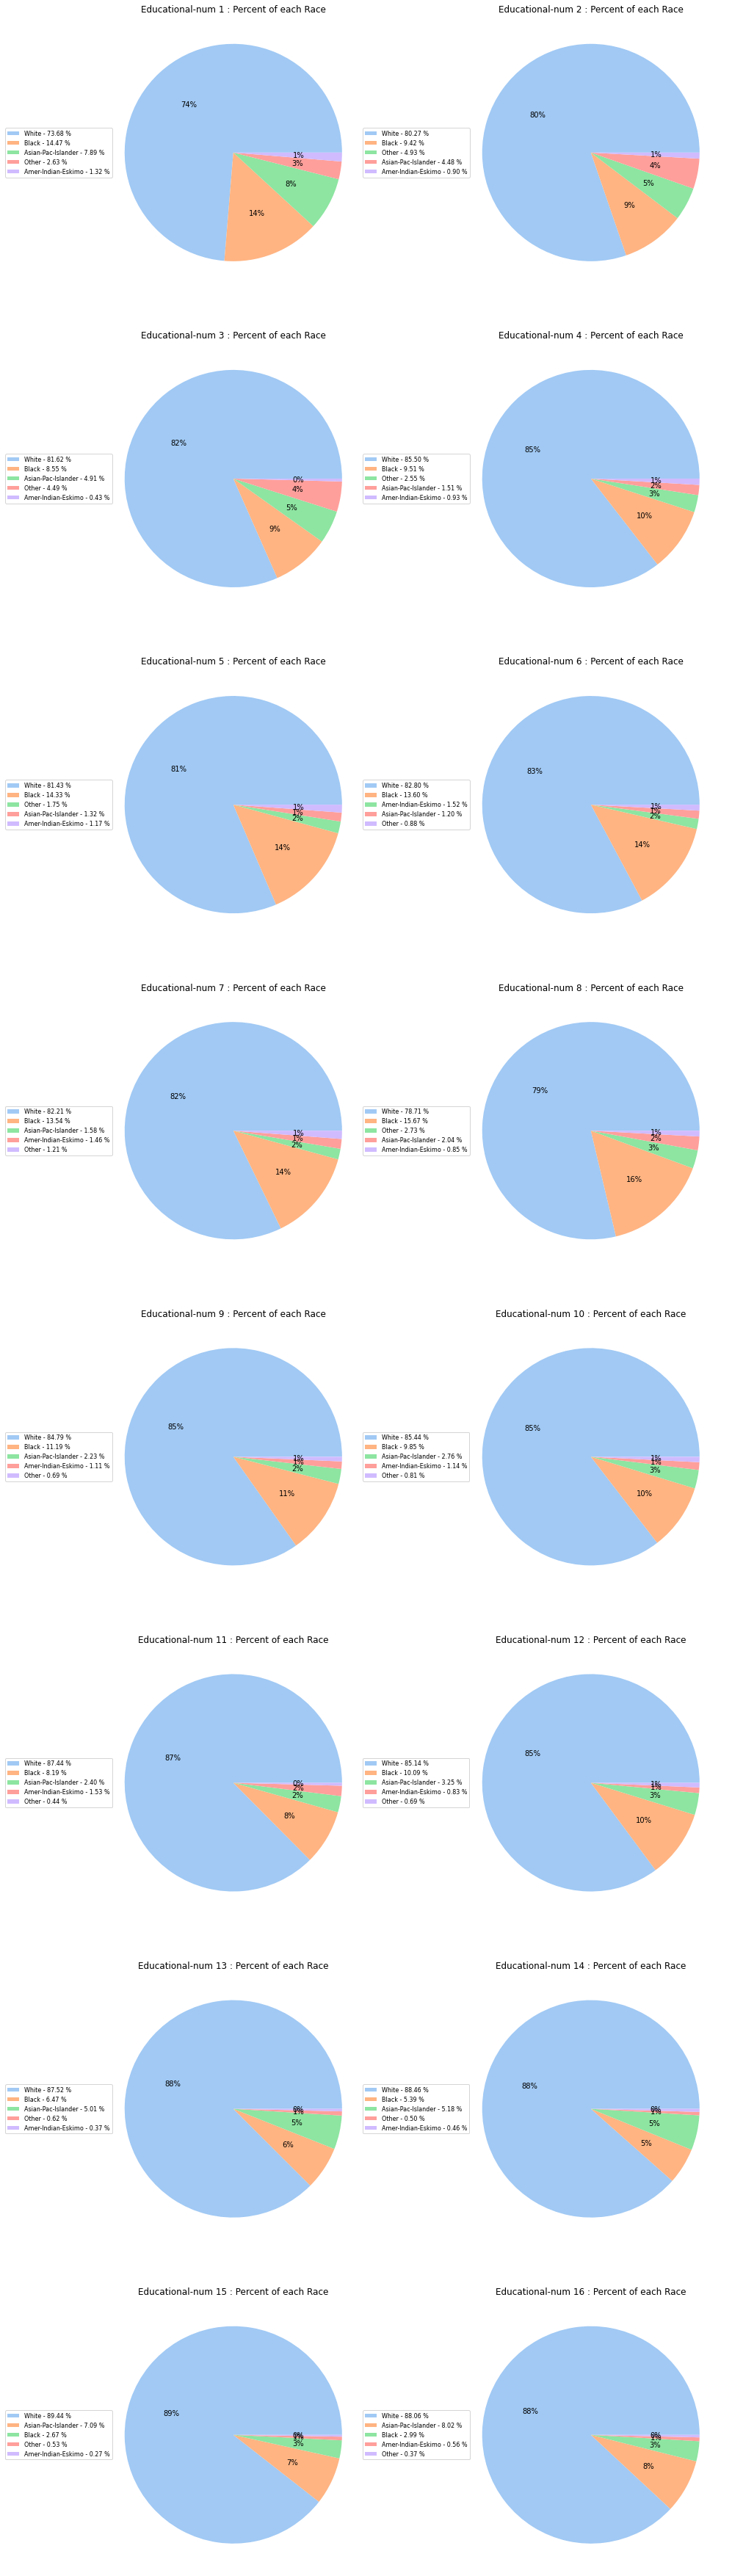

In [11]:
#RELATION BETWEEN EDUCATIONAL-NUM AND RACE
pd.set_option('display.max_colwidth', -1)

##DATA 가공
race_education=pd.DataFrame(train.groupby('educational-num')['race'].count())
#display(race_education)

pwhite=pd.DataFrame(train[train.race=='White'].groupby('educational-num')['race'].count())
pblack=pd.DataFrame(train[train.race=='Black'].groupby('educational-num')['race'].count())
pasian=pd.DataFrame(train[train.race=='Asian-Pac-Islander'].groupby('educational-num')['race'].count())
peskimo=pd.DataFrame(train[train.race=='Amer-Indian-Eskimo'].groupby('educational-num')['race'].count())
pother=pd.DataFrame(train[train.race=='Other'].groupby('educational-num')['race'].count())

pwhite.rename(columns={'race':'White'}, inplace=True)
pblack.rename(columns={'race':'Black'}, inplace=True)
pasian.rename(columns={'race':'AsianPacIslander'}, inplace=True)
peskimo.rename(columns={'race':'AmerIndianEskimo'}, inplace=True)
pother.rename(columns={'race':'Other'}, inplace=True)

#display(pwhite)
#display(pblack)
#display(pasian)
#display(peskimo)
#display(pother)


##각 race 별 edu
fig = plt.figure(figsize=(15,6))
plt.title('Race and Educational-num')
sns.countplot(data=train, x="race", hue="educational-num")
plt.show()

##각 race와 educational-num graph
race_education.index=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

fig = plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
plt.title('Race:White per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : White')
x=np.arange(16)
plt.bar(x, pwhite.White, width=0.4)
plt.xticks(x, race_education.index)

plt.subplot(3,2,2)
plt.title('Race:Black per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Black')
x=np.arange(16)
plt.bar(x, pblack.Black, width=0.4, color='#e28743')
plt.xticks(x, race_education.index)

plt.subplot(3,2,3)
plt.title('Race:Asian-Pac-Islander per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Asian-Pac-Islander')
x=np.arange(16)
plt.bar(x, pasian.AsianPacIslander, width=0.4, color='#5da244')
plt.xticks(x, race_education.index)

plt.subplot(3,2,4)
plt.title('Race:Amer-Indian-Eskimo per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Amer-Indian-Eskimo')
x=np.arange(16)
plt.bar(x, peskimo.AmerIndianEskimo, width=0.4, color='#a97cd0')
plt.xticks(x, race_education.index)

plt.subplot(3,2,5)
plt.title('Race:Other per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Other')
x=np.arange(16)
plt.bar(x, pother.Other, width=0.4, color='#e35f62')
plt.xticks(x, race_education.index)

plt.show()

##전체 합한 그래프
fig = plt.figure(figsize=(15,6))
plt.title('Race and Educational-num')
sns.countplot(data=train, x="educational-num", hue="race")
plt.show()


#copy the train
##change column name that can be used
df = train
new_names = {'educational-num':'edu_num'}
df = df.rename(columns=new_names)

colors = sns.color_palette('pastel')

fig = plt.figure(figsize=(16,64))
for i in range(1, 17):
    plt.subplot(8,2,i)
    plt.rc('font', size=10) 
    plt.xticks(rotation=90)
    #p1=pd.DataFrame(df[df.edu_num==1].groupby('occupation')['edu_num'].count())
    p=pd.DataFrame(df[df.edu_num==i].groupby('race')['edu_num'].count())
    p=p.sort_values(by=['edu_num'], axis=0, ascending=False)
    #display(p)
    pie=plt.pie(p.edu_num, colors=colors, autopct='%.0f%%')
    plt.title("Educational-num %i : Percent of each Race" %i)

    y=p.edu_num
    porcent = 100.*y/y.sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(p.index, porcent)]
    
    plt.legend(pie, labels=labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
      
plt.show()



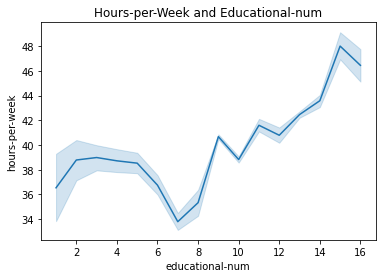

'Colored part: 95% confidence in average.'

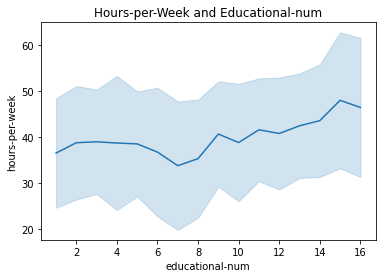

'Colored part: 95% confidence interval of the standard deviation.'

In [12]:
#RELATION BETWEEN EDUCATIONAL-NUM AND HOURS-PER-WEEK
##다시?

##DATA 가공
hours_education=pd.DataFrame(train.groupby('educational-num')['hours-per-week'].count())
#display(hours_education)

#hours-per-week는 각 시간을 10의 단위로 범주화 할 것??

plt.title('Hours-per-Week and Educational-num')
sns.lineplot(data=train, x="educational-num", y="hours-per-week")
plt.show()
display("Colored part: 95% confidence in average.")

plt.title('Hours-per-Week and Educational-num')
#sns.relplot(data=train, x="educational-num", y="hours-per-week", kind='line', ci= 'sd')
sns.lineplot(data=train, x="educational-num", y="hours-per-week", ci='sd')
plt.show()
display("Colored part: 95% confidence interval of the standard deviation.")

#sns.lmplot(data=train, x="educational-num", y="hours-per-week")

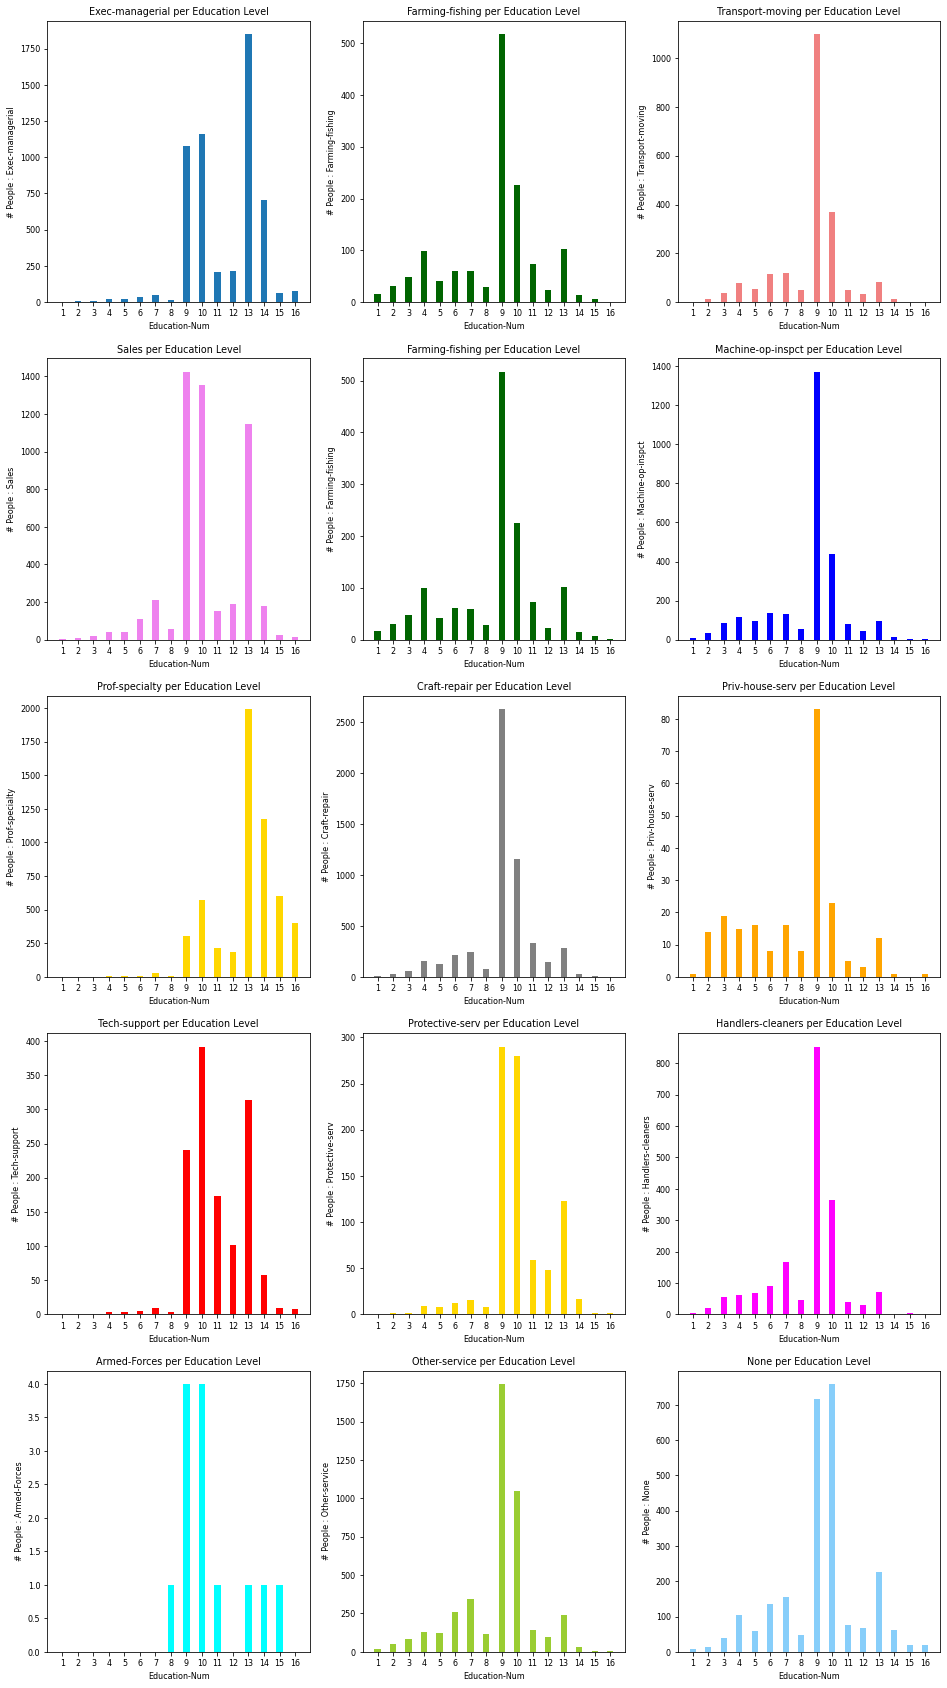

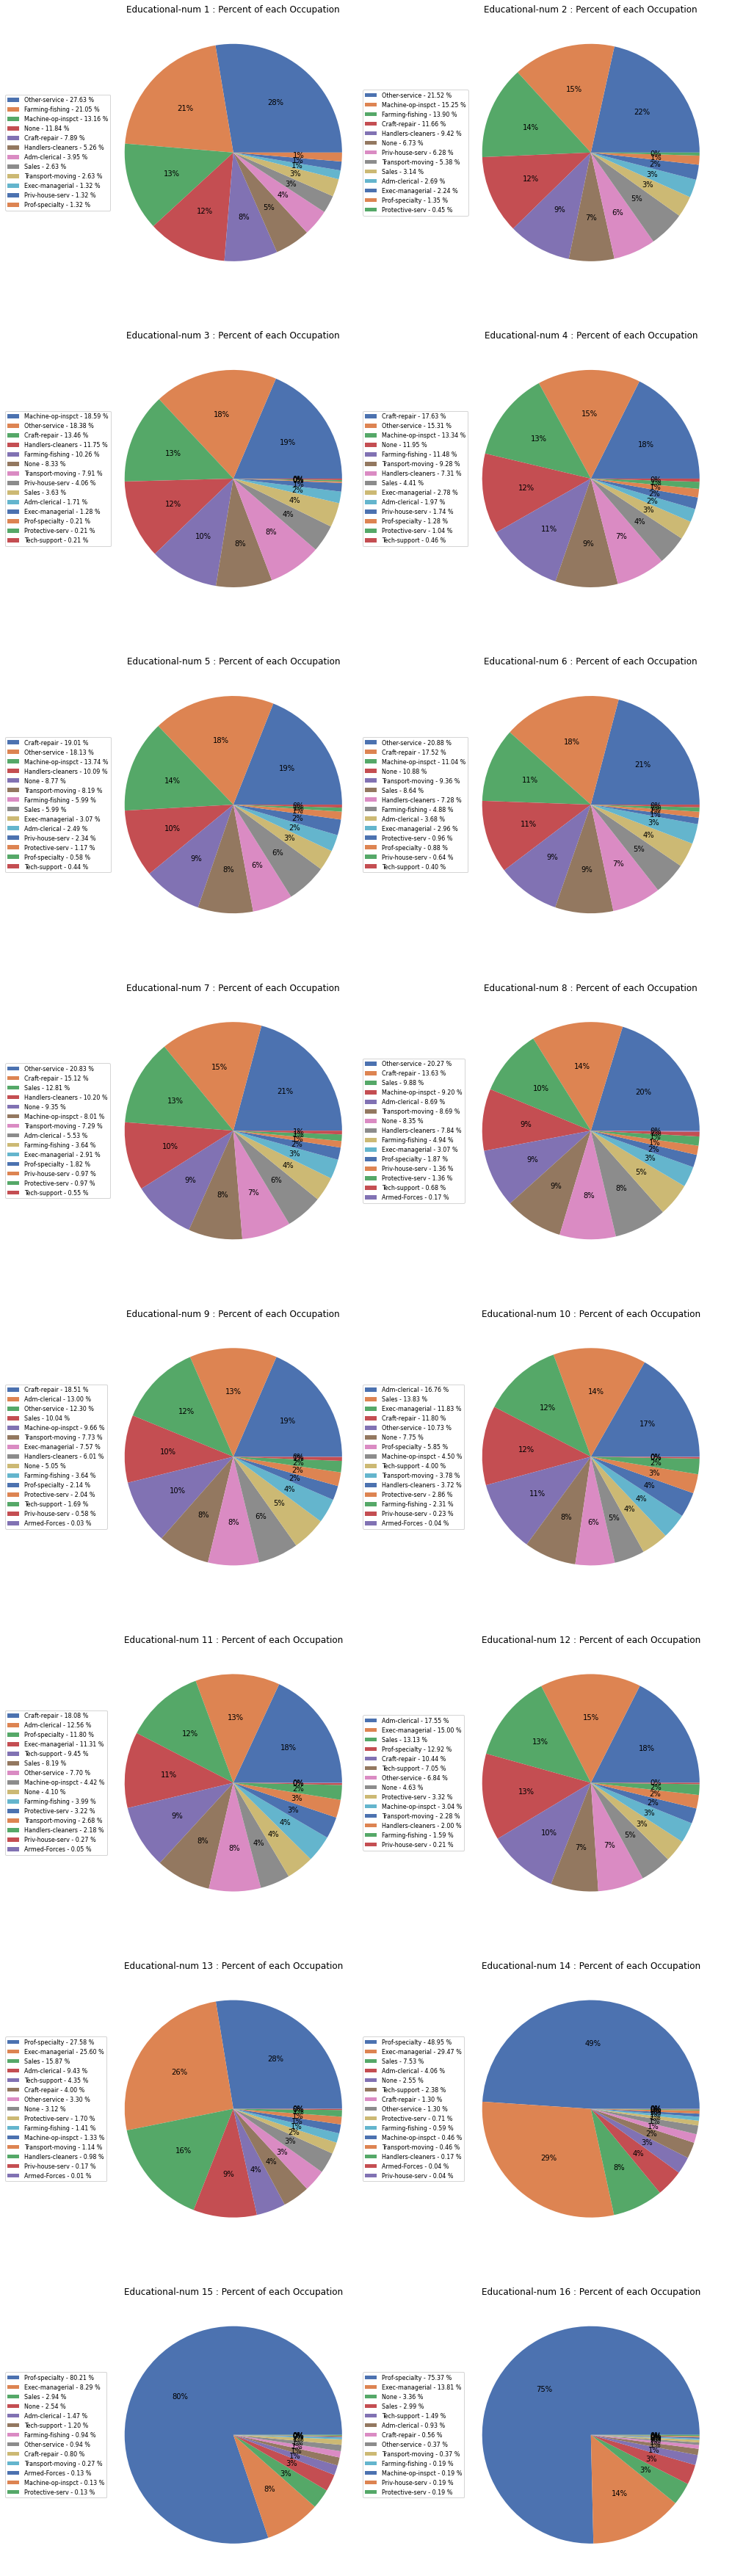

In [13]:
#RELATION BETWEEN EDUCATIONAL-NUM AND OCCUPATION

##DATA 가공
occupation_edu=pd.DataFrame(train.groupby('educational-num')['occupation'].count())
#display(occupation_edu)

'''
fig = plt.figure(figsize=(8,8))
plt.title('Occupation and Educational-num')
sns.countplot(data=train, x="educational-num", hue="occupation")
plt.show()
#display(train.occupation)
'''

occu = pd.Series(train['occupation'])
#display(occu)


#copy the train : df
##rip off the columns that we need
df = train

from io import StringIO

col = ['educational-num', 'occupation']
df = df[col]
#df = df[pd.notnull(df['Consumer complaint narrative'])]
#df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['educational-num'].factorize()[0]
category_id_df = df[['educational-num', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'educational-num']].values)
#df.head()

new_names = {'educational-num':'edu_num'}
df = df.rename(columns=new_names)
#df.head()



##각 직업 별 학력 그래프
occupation_edu.index=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

fig = plt.figure(figsize=(16,30))
plt.rc('font', size=8) 

plt.subplot(5,3,1)
pExec=pd.DataFrame(train[train.occupation=='Exec-managerial'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'Exec_managerial'}, inplace=True)
plt.title('Exec-managerial per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Exec-managerial')
x=np.arange(16)
plt.bar(x, pExec.Exec_managerial, width=0.4)
plt.xticks(x, occupation_edu.index)

plt.subplot(5,3,2)
pExec=pd.DataFrame(train[train.occupation=='Farming-fishing'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'Farming_fishing'}, inplace=True)
plt.title('Farming-fishing per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Farming-fishing')
x=np.arange(16)
plt.bar(x, pExec.Farming_fishing, width=0.4, color='darkgreen')
plt.xticks(x, occupation_edu.index)  
    
plt.subplot(5,3,3)
pExec=pd.DataFrame(train[train.occupation=='Transport-moving'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'Transport_moving'}, inplace=True)
plt.title('Transport-moving per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Transport-moving')
x=np.arange(16)
plt.bar(x, pExec.Transport_moving , width=0.4, color='lightcoral')
plt.xticks(x, occupation_edu.index)    

plt.subplot(5,3,4)
pExec=pd.DataFrame(train[train.occupation=='Sales'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'Sales'}, inplace=True)
plt.title('Sales per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Sales')
x=np.arange(16)
plt.bar(x, pExec.Sales , width=0.4, color='violet')
plt.xticks(x, occupation_edu.index)  

plt.subplot(5,3,5)
pExec=pd.DataFrame(train[train.occupation=='Farming-fishing'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'Farming_fishing'}, inplace=True)
plt.title('Farming-fishing per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Farming-fishing')
x=np.arange(16)
plt.bar(x, pExec.Farming_fishing, width=0.4, color='darkgreen')
plt.xticks(x, occupation_edu.index)  

plt.subplot(5,3,6)
pExec=pd.DataFrame(train[train.occupation=='Machine-op-inspct'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'Machine'}, inplace=True)
plt.title('Machine-op-inspct per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Machine-op-inspct')
x=np.arange(16)
plt.bar(x, pExec.Machine, width=0.4, color='blue')
plt.xticks(x, occupation_edu.index)  


plt.subplot(5,3,7)
pExec=pd.DataFrame(train[train.occupation=='Prof-specialty'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'Prof'}, inplace=True)
plt.title('Prof-specialty per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Prof-specialty')
x=np.arange(16)
plt.bar(x, pExec.Prof, width=0.4, color='gold')
plt.xticks(x, occupation_edu.index)  

plt.subplot(5,3,8)
pExec=pd.DataFrame(train[train.occupation=='Craft-repair'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'Craft'}, inplace=True)
plt.title('Craft-repair per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Craft-repair')
x=np.arange(16)
plt.bar(x, pExec.Craft, width=0.4, color='grey')
plt.xticks(x, occupation_edu.index)  


plt.subplot(5,3,9)
pExec=pd.DataFrame(train[train.occupation=='Priv-house-serv'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'house'}, inplace=True)

a_row = pd.Series({'house':0})
temp = pd.DataFrame([a_row], index = [15])
pExec = pd.concat([temp, pExec])
pExec=pExec.sort_index()

plt.title('Priv-house-serv per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Priv-house-serv')
x=np.arange(16)
plt.bar(x, pExec.house, width=0.4, color='orange')
plt.xticks(x, pExec.index)

plt.subplot(5,3,10)
pExec=pd.DataFrame(train[train.occupation=='Tech-support'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'tech'}, inplace=True)

a_row = pd.Series({'tech':0})
temp = pd.DataFrame([a_row], index = [0])
pExec = pd.concat([temp, pExec])
a_row = pd.Series({'tech':0})
temp = pd.DataFrame([a_row], index = [1])
pExec = pd.concat([temp, pExec])
pExec=pExec.sort_index()

#display(pExec)
plt.title('Tech-support per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Tech-support')
x=np.arange(16)
plt.bar(x, pExec.tech, width=0.4, color='red')
plt.xticks(x, occupation_edu.index)  


plt.subplot(5,3,11)
pExec=pd.DataFrame(train[train.occupation=='Protective-serv'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'Protective'}, inplace=True)
a_row = pd.Series({'Protective':0})
temp = pd.DataFrame([a_row], index = [1])
pExec = pd.concat([temp, pExec])
pExec=pExec.sort_index()
#display(pExec)
plt.title('Protective-serv per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Protective-serv')
x=np.arange(16)
plt.bar(x, pExec.Protective, width=0.4, color='gold')
plt.xticks(x, occupation_edu.index)  

plt.subplot(5,3,12)
pExec=pd.DataFrame(train[train.occupation=='Handlers-cleaners'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'handlers'}, inplace=True)
a_row = pd.Series({'handlers':0})
temp = pd.DataFrame([a_row], index = [14])
pExec = pd.concat([temp, pExec])
a_row = pd.Series({'handlers':0})
temp = pd.DataFrame([a_row], index = [15])
pExec = pd.concat([temp, pExec])
pExec=pExec.sort_index()

plt.title('Handlers-cleaners per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Handlers-cleaners')
x=np.arange(16)
plt.bar(x, pExec.handlers, width=0.4, color='magenta')
plt.xticks(x, occupation_edu.index)  


plt.subplot(5,3,13)
pExec=pd.DataFrame(train[train.occupation=='Armed-Forces'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'forces'}, inplace=True)
#display(pExec)

for i in range (1, 8):
    a_row = pd.Series({'forces':0})
    temp = pd.DataFrame([a_row], index = [i])
    pExec = pd.concat([temp, pExec])

a_row = pd.Series({'forces':0})
temp = pd.DataFrame([a_row], index = [12])
pExec = pd.concat([temp, pExec])
a_row = pd.Series({'forces':0})
temp = pd.DataFrame([a_row], index = [16])
pExec = pd.concat([temp, pExec])
pExec=pExec.sort_index()
#display(pExec)

plt.title('Armed-Forces per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Armed-Forces')
x=np.arange(16)
plt.bar(x, pExec.forces, width=0.4, color='cyan')
plt.xticks(x, occupation_edu.index)  

plt.subplot(5,3,14)
pExec=pd.DataFrame(train[train.occupation=='Other-service'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'Other_service'}, inplace=True)
plt.title('Other-service per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Other-service')
x=np.arange(16)
plt.bar(x, pExec.Other_service, width=0.4, color='yellowgreen')
plt.xticks(x, occupation_edu.index)

plt.subplot(5,3,15)
pExec=pd.DataFrame(train[train.occupation=='None'].groupby('educational-num')['occupation'].count())
pExec.rename(columns={'occupation':'nNone'}, inplace=True)
plt.title('None per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : None')
x=np.arange(16)
plt.bar(x, pExec.nNone, width=0.4, color='lightskyblue')
plt.xticks(x, occupation_edu.index)  


plt.show()



#RELATION BETWEEN EDUCATIONAL-NUM AND OCCUPATION - PART 2
##각 학력 별 직업 파이그래프

colors = sns.color_palette('deep')[0:15]

fig = plt.figure(figsize=(16,64))
for i in range(1, 17):
    plt.subplot(8,2,i)
    plt.rc('font', size=10) 
    plt.xticks(rotation=90)
    p=pd.DataFrame(df[df.edu_num==i].groupby('occupation')['edu_num'].count())
    #p=pd.DataFrame(df[df.edu_num==i].groupby('race')['educational-num'].count())
    p=p.sort_values(by=['edu_num'], axis=0, ascending=False)
    #display(p)
    pie=plt.pie(p.edu_num, colors=colors, autopct='%.0f%%')
    plt.title("Educational-num %i : Percent of each Occupation" %i)
    
    y=p.edu_num
    porcent = 100.*y/y.sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(p.index, porcent)]

    slices = np.arange(p.edu_num.count())
    #plt.tight_layout()
    plt.legend(pie, labels=labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
      
plt.show()



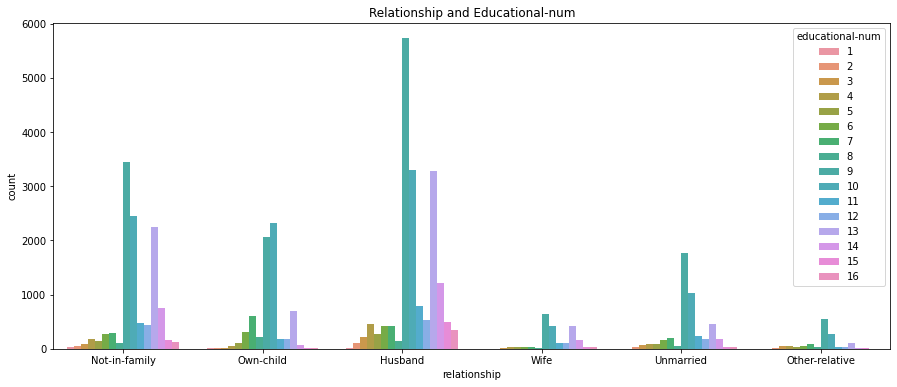

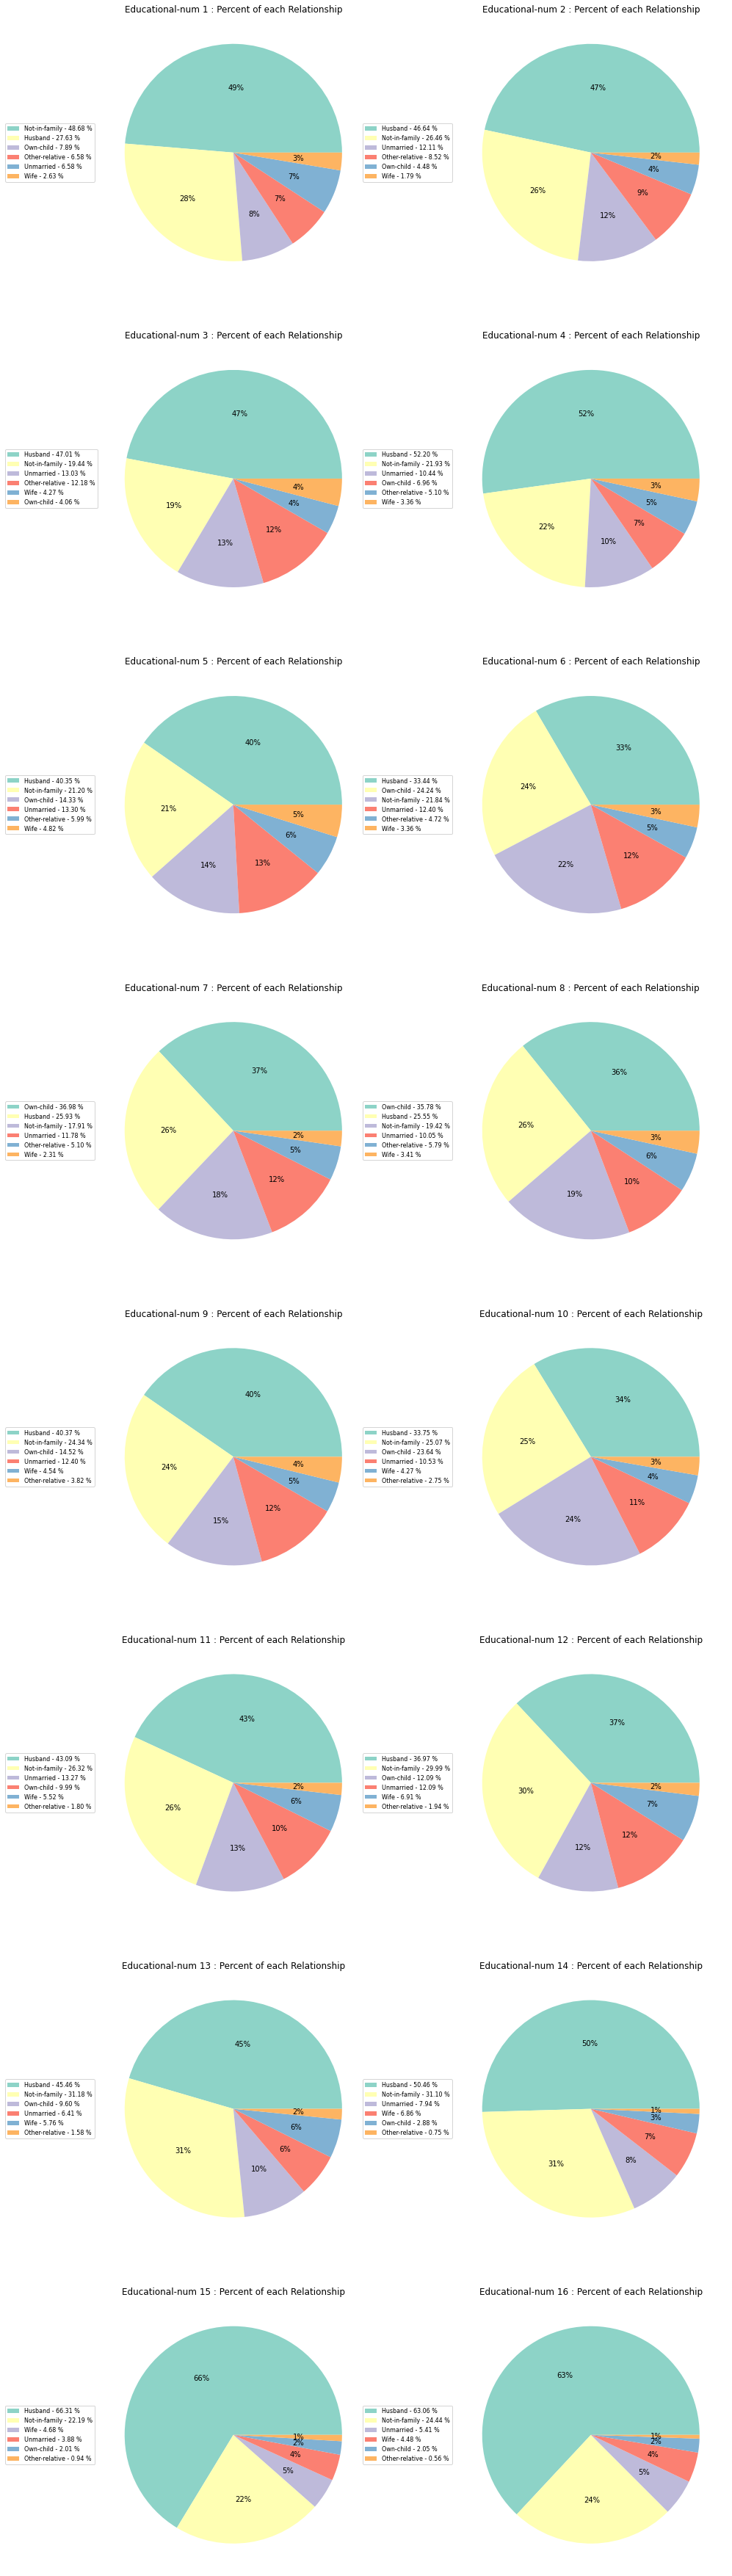

In [14]:
#RELATIONSHIP BETWEEN EDUCATIONAL-NUM AND RELATIONSHIP

fig = plt.figure(figsize=(15,6))
plt.title('Relationship and Educational-num')
sns.countplot(data=train, x="relationship", hue="educational-num")
plt.show()

#copy the train
##change column name that can be used
df = train
new_names = {'educational-num':'edu_num'}
df = df.rename(columns=new_names)


colors = sns.color_palette("Set3", 6)

fig = plt.figure(figsize=(16,64))
for i in range(1, 17):
    plt.subplot(8,2,i)
    plt.rc('font', size=10) 
    plt.xticks(rotation=90)
    #p1=pd.DataFrame(df[df.edu_num==1].groupby('occupation')['edu_num'].count())
    p=pd.DataFrame(df[df.edu_num==i].groupby('relationship')['edu_num'].count())
    p=p.sort_values(by=['edu_num'], axis=0, ascending=False)
    #display(p)
    pie=plt.pie(p.edu_num, colors=colors, autopct='%.0f%%')
    plt.title("Educational-num %i : Percent of each Relationship" %i)

    y=p.edu_num
    porcent = 100.*y/y.sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(p.index, porcent)]
    
    plt.legend(pie, labels=labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
      
plt.show()

